# Triangle Price Patterns

In [29]:
import pandas as pd
df = pd.read_csv("BankNifty_1m_5Years.csv")
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head(10)

,time,open,high,low,close,volume
0,2018-07-03 09:15:00,26181.0,26210.0,26165.2,26190.1,30440
1,2018-07-03 09:16:00,26189.1,26199.0,26180.0,26198.9,22160
2,2018-07-03 09:17:00,26200.0,26215.0,26195.0,26204.9,20080
3,2018-07-03 09:18:00,26204.0,26235.7,26202.3,26235.0,19560
4,2018-07-03 09:19:00,26235.9,26238.8,26218.4,26218.4,21120
5,2018-07-03 09:20:00,26218.2,26218.8,26197.8,26201.6,25840
6,2018-07-03 09:21:00,26199.7,26208.8,26196.1,26202.9,16720
7,2018-07-03 09:22:00,26200.4,26206.0,26192.9,26195.8,12880
8,2018-07-03 09:23:00,26199.4,26205.7,26196.8,26200.0,7560
9,2018-07-03 09:24:00,26199.4,26210.9,26196.8,26210.1,11280


In [30]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    if l-n1 < 0 or l+n2 >= len(df1):
        return 0
    
    pividlow=1
    pividhigh=1
    for i in range(l-n1, l+n2+1):
        if(df1.low[l]>df1.low[i]):
            pividlow=0
        if(df1.high[l]<df1.high[i]):
            pividhigh=0
    if pividlow and pividhigh:
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0
    
df['pivot'] = df.apply(lambda x: pivotid(df, x.name,3,3), axis=1)

## Pivot Candles Vizualisation

In [31]:
import numpy as np
def pointpos(x):
    if x['pivot']==1:
        return x['low']-1e-3
    elif x['pivot']==2:
        return x['high']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

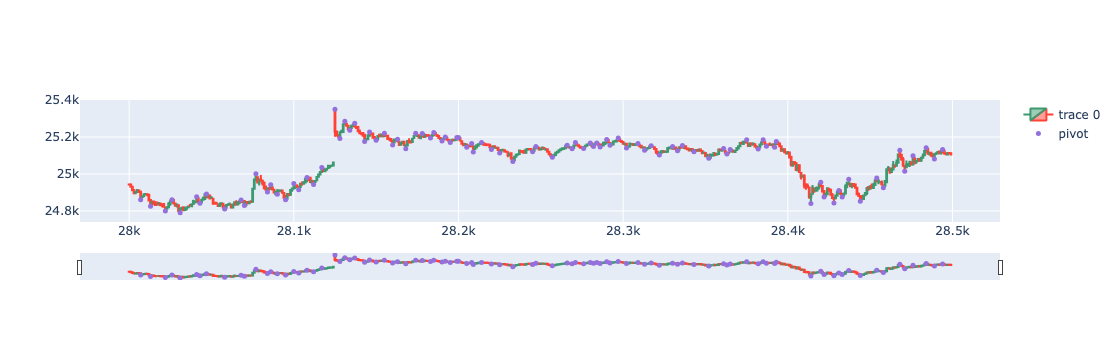

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[28000:28500]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

[44796.95 44780.   44791.75] [471948. 471983. 471990.]
[44837.6  44843.95 44859.7  44911.25 44914.95 44905.4  44891.45 44820.5
 44856.75] [471945. 471949. 471953. 471964. 471969. 471973. 471977. 471987. 471993.]
-0.2400921658985438 0.16885868478917507
-0.6221687247467638 0.08010359357037745


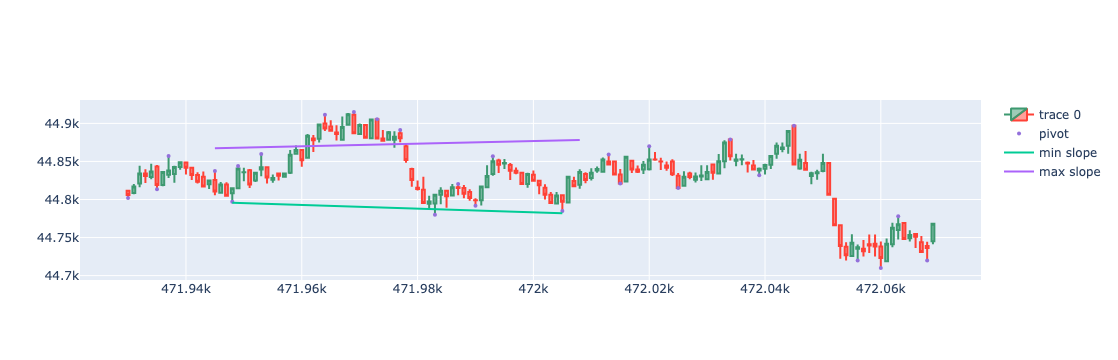

In [47]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import linregress

backcandles = 60

candleid = 472000

maxim = np.array([])
minim = np.array([])
xxmin = np.array([])
xxmax = np.array([])

for i in range(candleid-backcandles, candleid+1):
    if df.iloc[i].pivot == 1:
        minim = np.append(minim, df.iloc[i].low)
        xxmin = np.append(xxmin, i) #could be i instead df.iloc[i].name
    if df.iloc[i].pivot == 2:
        maxim = np.append(maxim, df.iloc[i].high)
        xxmax = np.append(xxmax, i) # df.iloc[i].name
print(minim,xxmin)
print(maxim,xxmax)
        
#slmin, intercmin = np.polyfit(xxmin, minim,1) #numpy
#slmax, intercmax = np.polyfit(xxmax, maxim,1)

slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)

print(slmin,slmax)
print(rmin, rmax)

dfpl = df[candleid-backcandles-10:candleid+backcandles+10]

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=4, color="MediumPurple"),
                name="pivot")

#-------------------------------------------------------------------------
# Fitting intercepts to meet highest or lowest candle point in time slice
#adjintercmin = df.low.loc[candleid-backcandles:candleid].min() - slmin*df.low.iloc[candleid-backcandles:candleid].idxmin()
#adjintercmax = df.high.loc[candleid-backcandles:candleid].max() - slmax*df.high.iloc[candleid-backcandles:candleid].idxmax()

xxmin = np.append(xxmin, xxmin[-1]+15)
xxmax = np.append(xxmax, xxmax[-1]+15)
#fig.add_trace(go.Scatter(x=xxmin, y=slmin*xxmin + adjintercmin, mode='lines', name='min slope'))
#fig.add_trace(go.Scatter(x=xxmax, y=slmax*xxmax + adjintercmax, mode='lines', name='max slope'))

fig.add_trace(go.Scatter(x=xxmin, y=slmin*xxmin + intercmin, mode='lines', name='min slope'))
fig.add_trace(go.Scatter(x=xxmax, y=slmax*xxmax + intercmax, mode='lines', name='max slope'))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [44]:
import numpy as np
from matplotlib import pyplot
from scipy.stats import linregress

backcandles= 20
print(df.shape[0])
for candleid in range(450000, len(df)):
    maxim = np.array([])
    minim = np.array([])
    xxmin = np.array([])
    xxmax = np.array([])
    for i in range(candleid-backcandles, candleid+1):
        if df.iloc[i].pivot == 1:
            minim = np.append(minim, df.iloc[i].low)
            xxmin = np.append(xxmin, i) #could be i instead df.iloc[i].name
        if df.iloc[i].pivot == 2:
            maxim = np.append(maxim, df.iloc[i].high)
            xxmax = np.append(xxmax, i) # df.iloc[i].name
    
    if (xxmax.size <3 and xxmin.size <3) or xxmax.size==0 or xxmin.size==0:
        continue
    
    #slmin, intercmin = np.polyfit(xxmin, minim,1) #numpy
    #slmax, intercmax = np.polyfit(xxmax, maxim,1)

    slmin, intercmin, rmin, pmin, semin = linregress(xxmin, minim)
    slmax, intercmax, rmax, pmax, semax = linregress(xxmax, maxim)
        
    if abs(rmax)>=0.7 and abs(rmin)>=0.7 and abs(slmin)<=0.00001 and slmax<-0.0001:
    # if abs(rmax)>=0.7 and abs(rmin)>=0.7 and slmin>=0.0001 and abs(slmax)<=0.00001:
    # if abs(rmax)>=0.9 and abs(rmin)>=0.9 and slmin>=0.0001 and slmax<=-0.0001:
        print(rmin, rmax, candleid)
        print(df.iloc[candleid])
        break
        
    if candleid % 1000 == 0:
        print(candleid)

491678
450000
451000
453000
455000
457000
458000
460000
461000
464000
466000
469000
470000
471000
473000
475000
476000
478000
480000
483000
484000
485000
486000
487000
489000
490000
491000
